In [7]:
import pandas as pd
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

In [8]:
listdir("./")

['.ipynb_checkpoints',
 'code',
 'codeplotten.py',
 'codetest.py',
 'CPC.csv',
 'CPC.ipynb',
 'Das',
 'DOS _0.5_and_1_on_PMDS.csv',
 'Dos.csv',
 'DOS.ipynb',
 'Dos_0.5and_1_on_Steel.csv',
 'SDS.csv',
 'SDS.ipynb',
 'test.py',
 'triton.csv',
 'Triton.ipynb',
 'triton2.csv',
 'triton3.csv',
 'water_glas.csv',
 'water_PDMS.csv',
 'water_staal.csv']

In [9]:
df = pd.read_csv("./SDS.csv", sep = ";")
df["SDS"].unique()

array([0.05, 0.1 , 0.5 , 1.  , 3.  , 5.  , 7.  ])

In [10]:
df

,SDS,tijd in min,hoek,error
0,0.05,0.5,26.4,0.04
1,0.05,3.0,32.4,0.04
2,0.05,6.0,31.8,0.02
3,0.05,9.0,31.4,0.05
4,0.05,12.0,31.4,0.06
5,0.05,15.0,31.1,0.04
6,0.05,20.0,31.2,0.01
7,0.05,60.0,30.7,0.07
8,0.10,0.5,25.4,0.10
9,0.10,3.0,23.6,0.02


In [11]:
df_list = list()
for conc in df["SDS"].unique():
    df_list.append(df[df["SDS"] == conc])

In [12]:
data_dict = dict()
for frame in df_list:
    time = frame["tijd in min"]
    angle = frame["hoek"]
    error = frame["error"]
    data_dict[frame["SDS"].unique()[0]] = (time,angle,error)

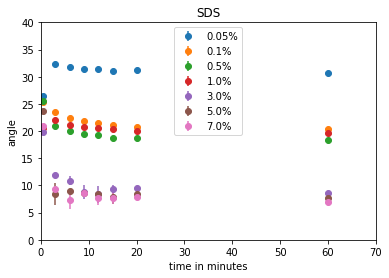

In [21]:
for name, values in data_dict.items():
    plt.errorbar(values[0],values[1],values[2], linestyle = "None", label = f"{name}%", marker = "o")
    
plt.legend()
plt.xlim(0,70)
plt.ylim(0,40)

plt.xlabel('time in minutes')
plt.ylabel('angle')

plt.title('SDS')
plt.savefig('SDS')

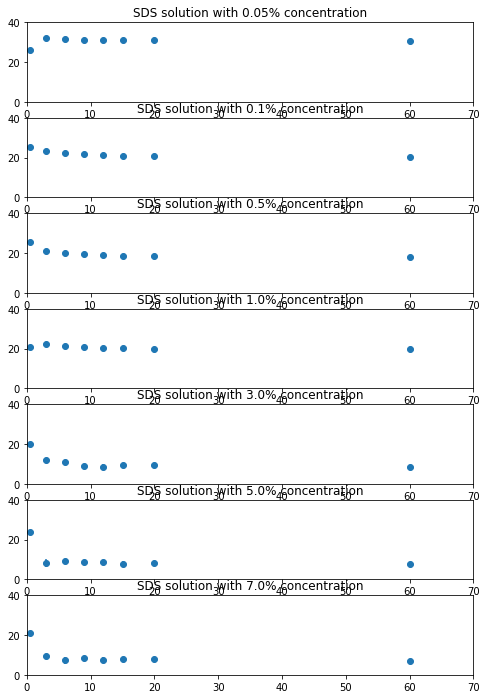

In [19]:
n_sets = 7

fig,ax = plt.subplots(n_sets,1, figsize = (8,12))
ax_idx = 0

for name, values in data_dict.items():
    ax[ax_idx].errorbar(values[0],values[1],values[2], linestyle = "None", label = f"{name}%", marker = "o")
    ax[ax_idx].set_xlim(0,70)
    ax[ax_idx].set_ylim(0,40)
    ax[ax_idx].set_title(f"SDS solution with {name}% concentration")
    ax_idx += 1

